In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# 1. Load Dataset

data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print(f"Features shape: {X.shape}, Labels shape: {y.shape}")
print("Feature names:", feature_names)
print("Target names:", target_names)

Features shape: (178, 13), Labels shape: (178,)
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']


In [6]:
# 2. Standardize Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 3. Apply PCA (5 Components)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained variance ratio (5 components):", pca.explained_variance_ratio_)
print("Total variance explained:", np.sum(pca.explained_variance_ratio_))


Explained variance ratio (5 components): [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294]
Total variance explained: 0.8016229275554788


In [8]:
# 4. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

In [9]:
# 5. Logistic Regression

model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy with 5 PCA components: 0.98

Confusion Matrix:


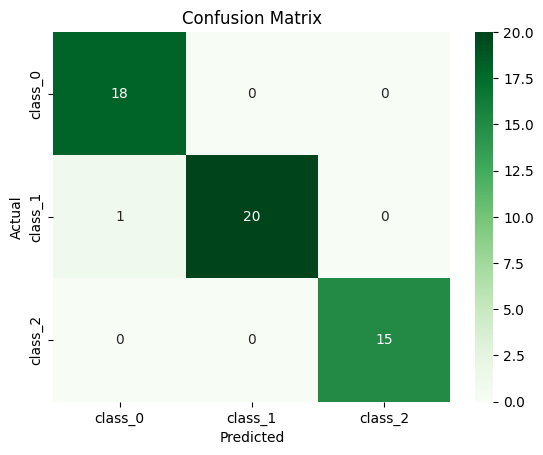


Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [10]:
# 6. Evaluation
# -------------------------------
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with 5 PCA components: {acc:.2f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap='Greens')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

PCA Components: 1, Accuracy: 0.8333
PCA Components: 2, Accuracy: 0.9259
PCA Components: 3, Accuracy: 0.9630
PCA Components: 4, Accuracy: 0.9630
PCA Components: 5, Accuracy: 0.9815
PCA Components: 6, Accuracy: 0.9815
PCA Components: 7, Accuracy: 0.9815
PCA Components: 8, Accuracy: 0.9815
PCA Components: 9, Accuracy: 0.9815
PCA Components: 10, Accuracy: 0.9815
PCA Components: 11, Accuracy: 0.9815
PCA Components: 12, Accuracy: 0.9815
PCA Components: 13, Accuracy: 0.9815


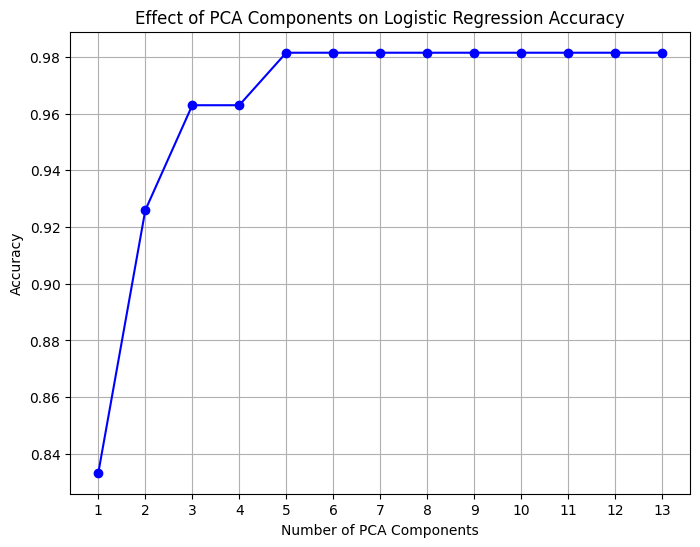

In [11]:
# Comparsion of Accuracy with number of PCA Components
 
# Store accuracy for each number of PCA components
accuracy_list = []

# Loop through 1 to 13 PCA components
for n_components in range(1, 14):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Logistic Regression
    model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    print(f"PCA Components: {n_components}, Accuracy: {acc:.4f}")

# Plot accuracy vs number of PCA components
plt.figure(figsize=(8,6))
plt.plot(range(1, 14), accuracy_list, marker='o', color='b')
plt.title("Effect of PCA Components on Logistic Regression Accuracy")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.xticks(range(1,14))
plt.grid(True)
plt.show()